## 이번 강의 목표 

* 레이블의 종류가 $2$인 분류문제에 대한 로지스틱 회귀  

> * 시그모이드 함수의 정의와 성질 

> * 로그손실 함수 

* 레이블의 종류가 $3$이상인 분류문제에 대한 소프트맥스 회귀 

> * 소프트맥스 함수의 정의와 성질  

> * 크로스 엔트로피 비용함수 

* `sklearn.linear_module`의 `LogisticRegression`을 이용한 로지스틱 회귀모델과 소프트맥스 회귀모델 



* 복습이 필요한 Numpy 함수:
> * `np.exp`  ([API](https://numpy.org/doc/stable/reference/generated/numpy.exp.html?highlight=exp#numpy.exp))   
> * `np.linspace` ([API](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html?highlight=linspace#numpy.linspace))
> * `np.min` ([API](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.min.html?highlight=min#numpy.ndarray.min))    
> * `np.argmin` ([API](https://numpy.org/doc/stable/reference/generated/numpy.argmin.html?highlight=argmin#numpy.argmin))  
> * `np.column_stack` ([API](https://numpy.org/doc/stable/reference/generated/numpy.column_stack.html?highlight=column_stack#numpy.column_stack))  
> * `np.meshgrid` ([API](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html?highlight=meshgrid#numpy.meshgrid))
> * `np.ndarray.ravel` ([API](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.ravel.html?highlight=ravel))



* 사용할 sklearn 모듈 및 메소드  

        from sklearn                         import datasets
        from sklearn.linear_model            import LogisticRegression
        from sklearn.linear_model            import SGDClassifier
        
        
* 익혀두면 그림 그릴 때 유용한 함수: 

> * `matplotlib.pyplot.contour`과 `matplotlib.pyplot.contourf` ([API](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.contourf.html))  
> * `matplotlib.pyplot.clabel` ([API](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.clabel.html?highlight=clabel#matplotlib.pyplot.clabel))

> * `matplotlib.colors.ListedColormap` ([API](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.colors.ListedColormap.html))  
> * [Creating Colormap](https://matplotlib.org/3.3.1/tutorials/colors/colormap-manipulation.html#sphx-glr-tutorials-colors-colormap-manipulation-py)

> * matplotlib의 cmap에 대한 [블로그](https://frhyme.github.io/python-lib/matplotlib_extracting_color_from_cmap/)  
> * [Choosing Colormaps in Matplotlib](https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html?highlight=colormap)

## 1. 1 로지스틱 회귀(logistic regression)의 학습모델 

* 레이블이 $1$, $0$인 두 개의 클래스에 대한 분류문제에서 샘플이 특정 클래스에 속할 확률을 추정하는 지도학습의 한 가지



* 선형회귀 모델과 같이 입력 특성의 가중치의 합(편향 포함) $\boldsymbol{\theta}^{\rm T}\mathbf x = \theta_0+\theta_1 x_1+\cdots +\theta_nx_n$을 계산한 다음 시그모이드 함수(sigmoid) $\sigma(t)=\dfrac{1}{1+\exp(-t)}$를 취한 값 $\sigma(\boldsymbol{\theta}^{\rm T}\mathbf x)$를 ${\rm P}(Y=1|X=\mathbf x)$에 대한 추정값 $\hat p(\mathbf x)$로 추정하는 모델.   


* 즉, 모델 파라미터 $\boldsymbol{\theta}=(\theta_0,\cdots,\theta_n)^{\rm T}$에 대한 로지스틱 회귀 모델을 $h_{\boldsymbol{\theta}}$라 할 때
$$ $$
$\quad \quad 
\hat p(\mathbf x) = h_{\boldsymbol{\theta}}(\mathbf x)= \sigma(\boldsymbol{\theta}^{\rm T}\mathbf x)
=\dfrac{1}{1+\exp(-\boldsymbol{\theta}^{\rm T}\mathbf x)}=\dfrac{1}{1+\exp\bigl(-(\theta_0+\theta_1x_1+\cdots+\theta_n x_n)\bigr)} 
$  <span style="color:blue">$\cdots\cdots$ (1)</span>

* 시그모이드 함수를 생각하는 이유:  
> * 확률 $0<p<1$에 대해 오즈(odds) $\dfrac{p}{1-p}$는 $(0,\infty)$사이의 값을 가지므로 로그-오즈(log-odds) 또는 로짓이라 부르는 $\ln \left(\dfrac{p}{1-p}\right)$는 $(-\infty, \infty)$ 사이의 값을 가짐  
> * 이 로짓을 선형모델로 추정하는 것이 로지스틱 회귀모델. 즉, $\ln \left(\dfrac{p}{1-p}\right)=\boldsymbol{\theta}^{\rm T}\mathbf x$으로부터 $p$를 구하면 식<span style="color:blue"> (1)</span>이 나옴 

* <span style="color:blue"> 로지스틱 회귀 모델을 통한 레이블의 예측 :</span>    
> * 샘플 $\mathbf x$가 양성 클래스(y=1)에 속할 확률 $\hat p(\mathbf x)=h_{\boldsymbol{\theta}}(\mathbf x)$를 추정한 후 다음과 같이 예측 $\hat y$를 구함 
$$ $$
$$
\hat y = \begin{cases} 0 & \text{ if }\hat p(\mathbf x)<0.5\\ 1 &\text{ if }\hat p(\mathbf x)\ge0.5
\end{cases}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

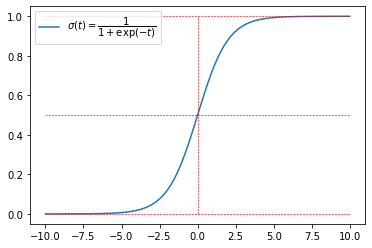

In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

xlist = np.linspace(-10,10,1000)
ylist = sigmoid(xlist)

plt.plot(xlist,ylist, label=r"$\sigma (t)=\dfrac{1}{1+\exp(-t)}$")

plt.plot([-10,10],[0.5,0.5], 'r--', linewidth=0.6)
plt.plot([-10,10],[1,1], 'r--', linewidth=0.6)
plt.plot([-10,10],[0,0], 'r--', linewidth=0.6)
plt.plot([0,0],[0,1],'r--', linewidth=0.6)

plt.legend(loc="upper left", fontsize=10)

## 1. 2 로지스틱 회귀모델의 학습 

* 훈련 데이터셋 $\{(\mathbf x_i,y_i)|1\le i \le m\}$이 주어질 때, 다음과 같이 정의되는 로지스틱 회귀의 비용함수(로그손실 함수) 
$$ $$
$J(\boldsymbol{\theta}) = -\dfrac 1 m \sum_{i=1}^m \left
(y_i \ln p_i + (1-y_i)\ln (1-p_i)\right)\quad $ (단, $p_i= \sigma(\boldsymbol{\theta}^{\rm T}\mathbf x_i$) <span style="color:blue">$\cdots (2)$</span>
$$ $$
가 최소가 되는 모델 파라미터 $\boldsymbol{\theta}$를 구하는 것   
> * $\text{P}(Y_i=1|X=\mathbf x_i)=p_i$이므로 $\text{P}(Y_i=0|X=\mathbf x_i)=1-p_i$이고 훈련 데이터셋은 iid 확률변수 $(X_i,Y_i)$ $(1\le i \le m)$에 대한 값이므로 로지스틱 회귀 모델에 대한 비용함수가 최소가 되는 $\boldsymbol{\theta}$를 구하는 것은 $\boldsymbol{\theta}$에 대한 로그우도함수 $\ell(\boldsymbol{\theta})= \ln\left(\text{P}(y_1,\cdots,y_m|\mathbf x_1,\cdots,\mathbf x_m:\boldsymbol{\theta})\right)$가 최대가 되는 $\boldsymbol{\theta}$를 구하는 것과 같다. 

$$
\begin{aligned}
J(\boldsymbol{\theta})=& -\dfrac 1 m \ln\left(\prod_{i=1}^m p_i^{y_i} (1-p_i)^{(1-y_i)}\right)\\
=& -\dfrac 1 m \ln\left(\text{P}(Y_1=y_1,\cdots,Y_m=y_m|X_1=\mathbf x_1,\cdots,X_m=\mathbf x_m :\boldsymbol{\theta}\right)
\end{aligned}
$$
$$ $$   
* 비용함수 $J(\boldsymbol{\theta})$는 $\boldsymbol{\theta}$에 대해 아래로 볼록한 함수이므로 최솟값이 존재함을 보장할 수 있지만, 정규방정식처럼 해를 구하는 공식은 없음  
> * 경사하강법 또는 다른 최적화 알고리즘을 이용하여 해의 근삿값을 구함 (`sklearn.linear_model` 모듈의 `LogisticRegression`의 `solver`참고)
> * 배치 경사하강법을 적용할 때 비용함수에 대한 그래디언트 벡터 $\nabla_{\boldsymbol{\theta}}J(\boldsymbol{\theta})$ : 각 $i$ ($1\le i\le m)$에 대해 $\nabla_{\boldsymbol{\theta}}J(\boldsymbol{\theta})$의 $j$번째 성분은 
$$\dfrac{\partial}{\partial \theta_j} J(\boldsymbol{\theta})= \dfrac 1 m \sum_{i=1}^m \left(
\sigma(\boldsymbol{\theta}^{\rm T}\mathbf x_i)-y_i\right)x_{ij},\quad \mathbf x_i=(1,x_{i1},\cdots,x_{in})$$
<span style="color:red"> (check 1)</span>

* `sklearn.linear_model` 모듈의 `LogisticRegression` [API](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logisticregression#sklearn.linear_model.LogisticRegression)  또는 확률적 경사하강법을 이용하는 `sklearn.linear_model` 모듈의 `SGDClassifier` [API](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html?highlight=sgdclassifier#sklearn.linear_model.SGDClassifier)를 사용(이 경우 `loss="log"`로 설정해야 로지스틱 회귀)
> * 다른 선형회귀 모델처럼 로지스틱 회귀 모델도 $\ell_1$, $\ell_2$ 규제항을 사용하여 규제할 수 있으며 `LogisticRegression`은 $\ell_2$ 페널티를 기본으로 함 (`penalty="l2"`, `penalty="none"`과 같이 사용)
$$ $$
> * <span style="color:blue">규제가 있는 `SGDClassifier(loss='log')` 모델의 경우 선형회귀 모델(`SGDRegressor`)의 경우처럼 규제를 조절하는 하이퍼파라미터가 `alpha`이지만, `LogisticRegression`의 경우에는 `alpha`의 역수에 해당하는 `C`가 규제를 조절하는 하이퍼파라미터</span>  
>> * `C`의 기본값은 $1$, C가 커지면 규제가 작아지고, C가 작아지면 규제가 커짐 
$$ $$
* 로지스틱 회귀 모델로 `LogisticRegression`을 사용하는 경우 
> * 최적화에 사용되는 알고리즘은 `solver`를 통해 선택할 수 있으며 기본값은 `solver="lbfgs"` (선택한 페널티 항에 대해 사용할 수 있는 최적화 알고리즘에 제한이 있으므로 자세한 내용은 위 API를 참고)  
$$ $$
> * 이진 분류가 아닌 경우, 즉, 클래스의 종류가 $3$이상일 때는 입력변수 `multi_class`를 `multi_class="multinomial"`로 두면 뒤에 설명할 소프트맥스 회귀 모델이 됨  
>> * `multi_class="ovr"`이면 일대다 전략을 사용 
$$ $$
> * 학습이 끝난 후 예측은 `predict` 메소드를 이용하고, 확률값은 `predict_proba` 메소드를 이용 

> * 학습된 객체의 `score` 메소드는 정확도(accuracy)를 사용 

## 1. 3 로지스틱 회귀 실습 

* 데이터셋 : 붓꽃 데이터셋 (sklearn의 datasets에 포함되어 있는 데이터셋)   
> * Setosa, Versicolor, Virginica 세 품종의 붓꽃 150개에 대한 꽃잎(petal), 꽃받침(sepal)의 너비와 길이를 담고 있는 데이터셋
$$ $$
> * [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Iris/)  
> * 세 품종의 그림
| Setosa| Versicolor| Virginica|
    |-|-|-|
    |<img src=".\images\week10\setosa.jpg" width="200">|<img src=".\images\week10\versicolor.jpg" width="200">  |<img src=".\images\week10\virginica.jpg" width="200">  |
    | [그림출처](https://www.flickr.com/photos/nhq9801/9200911388/)|[그림출처](https://commons.wikimedia.org/wiki/File:Blue_Flag,_Ottawa.jpg)  |[그림출처](https://commons.wikimedia.org/wiki/File:Iris_virginica_2.jpg)  |
    
* 꽃잎(petal)의 너비를 virginica 품종인지 아닌지를 판별하는 로지스틱 회귀 예측기를 구성해보자.  
> * 주어진 데이터를 모두 이용하여 학습시키고, virginica 품종으로 예측하는 너비의 경계를 구해보자.  

In [3]:
# 데이터셋 로드 
from sklearn import datasets

iris = datasets.load_iris()

In [4]:
# 로드된 데이터셋은 일종의 dictionary 형태
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
print(iris["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

#### 꽃잎의 너비를 이용하여 virginica를 판별하는 로지스틱 회귀 모델 

In [8]:
# 꽃잎의 너비(petal)을 이용하여 virginica이면 레이블 1, 아니면 레이블 0이 되도록 학습 

X = iris["data"][:,3:] 
y = (iris["target"] == 2).astype(np.int) 

C:\Users\82108\anaconda3\envs\ML2021\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
log_reg = LogisticRegression(penalty="none")
log_reg.fit(X,y)

LogisticRegression(penalty='none')

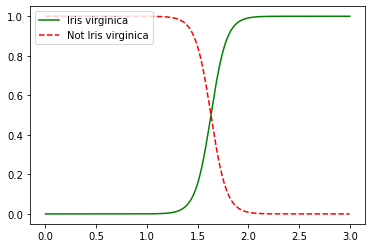

In [11]:
X_new = np.linspace(0, 3, 1000).reshape(-1,1)
y_new_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_new_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_new_proba[:, 0], "r--", label="Not Iris virginica")
plt.legend(loc="upper left", fontsize=10)

In [12]:
positive_idx = y_new_proba >=0.5
print(np.min(y_new_proba[positive_idx]))
decision_id = np.argmin(y_new_proba[positive_idx])
print(np.argmin(y_new_proba[positive_idx]))
print(f"Virginica로 판별하는 너비의 길이: 대략 {X_new[decision_id,0]:.2f}cm 이상일 때")

0.503258740917635
543
Virginica로 판별하는 너비의 길이: 대략 1.63cm 이상일 때


#### 꽃잎의 너비와 길이를 이용하여 virginica를 판별하는 로지스틱 회귀모델 

C:\Users\82108\anaconda3\envs\ML2021\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


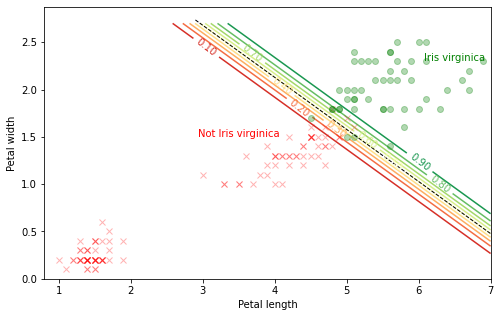

In [13]:
X2 = iris["data"][:, 2:]  # 꽃잎의 길이, 너비 
y2 = (iris["target"] == 2).astype(np.int)

log_reg2 = LogisticRegression(C=10**10, random_state=42)
log_reg2.fit(X2, y2)

# 그림을 그리기 위한 작업
x0, x1 = np.meshgrid(        
        np.linspace(0.8, 7, 800).reshape(-1, 1),
        np.linspace(0, 2.7, 400).reshape(-1, 1),
    )

X2_new = np.column_stack([x0.ravel(), x1.ravel()])

y2_proba = log_reg2.predict_proba(X2_new)

plt.figure(figsize=(8, 5))
plt.plot(X2[y2==0, 0], X2[y2==0, 1], "rx", alpha=0.3)
plt.plot(X2[y2==1, 0], X2[y2==1, 1], "go", alpha=0.3)

zz = y2_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, levels=9, cmap=plt.cm.RdYlGn)

# 확률이 0.5인 결정 경계 계산
left_right = np.array([2.9, 7])
boundary = -(log_reg2.coef_[0][0] * left_right + log_reg2.intercept_[0]) / log_reg2.coef_[0][1]

# 등위선에 대응되는 확률값 표시 
plt.clabel(contour, inline=1, fontsize=10, fmt='%1.2f')
plt.plot(left_right, boundary, "k--", linewidth=1)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=10, color="r", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=10, color="g", ha="center")
plt.xlabel("Petal length", fontsize=10)
plt.ylabel("Petal width", fontsize=10)
# plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

## 2. 1 소프트맥스 회귀(softmax regression)의 학습 모델 


* 다중 클래스에 대한 분류문제에서 샘플이 특정 클래스에 속할 확률을 추정하는 지도학습의 한 가지  
> * $2$개의 클래스에 대한 이진 분류기를 여러 개 사용하여 다중 분류문제에 대한 분류기를 만들 수도 있음  
>> * **일대다 전략**(**OvR**(One versus the Rest) 또는 **OvA**(One versus All) 전략):  
$$ $$
>> 한 개의 클래스만 양성, 나머지는 음성으로 분류하는 이진 분류기를 클래스의 개수만큼 학습시킨 후, 주어진 샘플이 각 분류기에 대해 양성이 될 확률값을 계산하고 이 확률값이 가장 큰 클래스로 분류하는 방법 
$$ $$
>> * **일대일 전략**(**OvO**(One versus One) 전략):
$$ $$
>> 주어진 $K$개의 클래스 중에서 $2$개의 클래스 조합마다 이진 분류기를 학습시켜 총 $K(K-1)/2$개의 학습된 이진분류기 만들고, 주어진 샘플에 대해 $K(K-1)/2$개의 분류기에 대한 레이블을 구해서 가장 많이 양성으로 분류된 클래스를 선택하는 방법  
$$ $$
>> * 로지스틱 회귀모델의 경우에 `LogisticRegression`의 입력변수 `multi_class`를 `multi_class="ovr"`로 설정하면 다중 분류기를 학습시킬 수 있음  

* 소프트맥스 회귀 모델:  
$$ $$
훈련 데이터셋 $\{(\mathbf x_i,y_i)|1\le i \le m\}$이 주어질 때 (단, 가능한 레이블의 종류는 $K$ 가지이고, $\mathbf x_i=(1,x_{i1},\cdots,x_{in})^{\rm T}$)
> * (1) $K$ 개의 클래스 각각에 대해 모델 파라미터 $\boldsymbol{\theta}_k=(\theta_{k0},\theta_{k1},\cdots,\theta_{kn})^{\rm T}$ ($k=1,2,\cdots,K$)를 이용하여 샘플 $\mathbf x$의 클래스 $k$에 대한 점수(score) $s_k(\mathbf x)=\boldsymbol{\theta}_k^{\rm T}\mathbf x$를 계산하고,  
$$ $$
이때, 각 클래스 $k$에 대한
>> * 점수를 성분으로 갖는 벡터를 $\mathbf s(\mathbf x)=(s_1(\mathbf x),\cdots,s_K(\mathbf x))^{\rm T}$라 하고,   
>> * <span style="color:blue">$\boldsymbol{\theta}_k$를 행벡터로 갖는 $k\times (n+1)$ 행렬을 $\mathbf \Theta = (\theta_{ij})$라고 함</span>
$$ $$  
> * (2) $\mathbf t=(t_1,\cdots,t_K)^{\rm T}\in \mathbb R^K$에 대해 소프트맥스 함수 $\sigma: \mathbb R^K\to [0,1]^K$를 다음과 같이 정의할 때 
 $$\sigma(\mathbf t) = \left(\dfrac{\exp(t_1)}{\sum_{k=1}^K \exp(t_k)},\cdots,\dfrac{\exp(t_K)}{\sum_{k=1}^K \exp(t_k)}\right)^{\rm T}$$
$$ $$   
>> * $\sigma(\mathbf t)$의 $i$번째 성분을 $\sigma(\mathbf t)_i$라 할 때 
$$ \sigma(\mathbf t)_1+\cdots + \sigma(\mathbf t)_K=1$$  
>> * 아래 이론연습 문제 (3) 참고 
$$ $$
> * (3) 클래스 $k$에 속할 확률 $\hat p_k(\mathbf x)$를 다음과 같이 추정 (<span style="color:blue">오해의 소지가 없을 때는 $\hat p_k(\mathbf x)$를 간단히 $\hat p_k$로 나타냄</span>) 
$$\hat{p}_k = \sigma(\mathbf s(\mathbf x))_k= \dfrac{\exp(s_k(\mathbf x))}{\sum_{i=1}^K \exp(s_i(\mathbf x))}$$
$$ $$
> * <span style="color:blue"> (4) 샘플 $\mathbf x$에 대한 레이블의 예측은 추정확률 $\hat{p}_k$가 최대가 되는 $k$로 예측</span> 즉,
$$ $$
$$\hat y = \text{argmax}_k \hat{p}_k=\text{argmax}_k \sigma(\mathbf s(\mathbf x))_k
=\text{argmax}_k s_k(\mathbf x) = \text{argmax}_k \boldsymbol{\theta}_k^{\rm T}\mathbf x, \ (1\le k\le K)$$  
>> * 소프트맥스 회귀 분류기는 하나의 샘플에 대해 하나의 클래스만 예측 (즉, 하나의 사진에서 여러 사람의 얼굴을 인식하는 것과 같은 다중 출력 분류기는 아님)

## 2. 2. 소프트맥스 회귀 모델의 학습 

* 소프트맥스 회귀 모델에서 레이블이 $k$가 확률의 추정값은 $\hat p_k(\mathbf x)=\text{P}(Y=k|X=\mathbf x)$이고 훈련 데이터셋이 iid로부터 얻은 샘플이므로 로그우도함수
$$
\ln\bigl(\text{P}(y_1,\cdots,y_m|\mathbf x_1,\cdots,\mathbf x_m:\mathbf \Theta)\bigr)=\sum_{i=1}^m \ln\bigl(\text{P}(Y=y_i|X=\mathbf x_i:\mathbf \Theta)\bigr)
$$
가 최대가 되는 모델 파라미터 $\mathbf \Theta=(\theta_{ij})$를 구하는 것이 소프트맥스 회귀 모델의 학습   
> * $i$번째 샘플에 대한 레이블 $y_i\in \{1,\cdots,K\}$를 **원-핫(one hot)**인코딩으로 표현하여 레이블 값에 해당하는 한 성분만 $1$이고 나머지 성분은 모두 $0$인 벡터  $(y_{i1},\cdots,y_{iK})^{\rm T}$로 생각하면 (즉, $K=4$이고 $y_i=2$인 경우 $y_i$의 원-핫 인코딩은 $(0,1,0,0)^{\rm T}$)
$$\text{P}(Y=y_i|X=\mathbf x_i:\mathbf \Theta)=\prod_{k=1}^K \hat{p}_k(\mathbf x_i)^{y_{ik}}=\prod_{k=1}^K \bigl(\sigma(\mathbf \Theta\mathbf x_i)_k\bigr)^{y_{ik}}=\prod_{k=1}^K \left(\dfrac{\exp(\boldsymbol{\theta}_k^{\rm T}\mathbf x_i)}{\sum_{k=1}^K \exp(\boldsymbol{\theta}_k^{\rm T}\mathbf x_i)} \right)^{y_{ik}}$$

* 즉, 소프트맥스 회귀 모델에 대한 비용함수 $J(\mathbf \Theta)$는 위 로그우도함수의 부호를 바꾸고 모든 샘플에 대한 평균을 구하여 다음과 같이 정의함
$$J(\mathbf \Theta)=-\dfrac 1 m \sum_{i=1}^m\sum_{k=1}^K y_{ik}\ln(\hat{p}_k(\mathbf x_i))=-\dfrac 1 m \sum_{i=1}^m\sum_{k=1}^K y_{ik}\ln\left(\dfrac{\exp(\boldsymbol{\theta}_k^{\rm T}\mathbf x_i)}{\sum_{k=1}^K \exp(\boldsymbol{\theta}_k^{\rm T}\mathbf x_i)} \right)$$  
$$ $$ 
* 위에서 정의한 비용함수 $J(\mathbf \Theta)$를 **크로스 엔트로피(cross entropy)** 비용함수라고 부름  
> * 크로스 엔트로피는 **정보이론**에서 유래한 것으로 두 이산확률분포 $p: P(X=k)=p_k\ (1\le k\le K)$와 $q: P(X=k)=q_k\ (1\le k\le K)$에 대한 크로스 엔트로피는 $H(p,q)=-\sum_{k=1}^K p_k \ln q_k$로 정의됨  
$$ $$
> * 일반적으로 두 이산확률분포 $p, \ q$가 어느 정도 비슷한 분포인지에 대한 측도인 **쿨백-라이블러 발산(Kullback-Leibler divergence)** $K(p||q)$는 $K(p||q)=H(p,q)-H(p,p)$로 정의되고 항상 $K(p||q)\ge 0$이 성립함 
$$ $$

* 다음과 같이 계산되는 그래디언트 벡터 $\nabla_{\mathbf \theta}J(\mathbf \Theta)$를 이용하여 경사하강법 또는 다른 최적화 알고리즘을 이용하여 크로스 엔트로피 비용함수가 최소가 되는 모델 파라미터 $\mathbf \Theta$를 구함 
<span style="color:red"> (check 2)</span>
$$
\nabla_{\boldsymbol{\theta}_k}J(\mathbf \Theta) = \dfrac 1 m\sum_{i=1}^m (\hat{p}_{k}(\mathbf x_i)-y_{ik})\mathbf x_i=\dfrac 1 m\sum_{i=1}^m \left(\dfrac{\exp(\boldsymbol{\theta}_k^{\rm T}\mathbf x_i)}{\sum_{k=1}^K \exp(\boldsymbol{\theta}_k^{\rm T}\mathbf x_i)} -y_{ik}\right)\mathbf x_i,\ (1\le k \le K)
$$
> * 위 식을 이용하여 각 파라미터 벡터 $\boldsymbol{\theta}_k$ $(k=1,\cdots,K)$를 업데이트 시킴 
$$ $$
* `sklearn.linear_model` 모듈의 `LogisticRegression`클래스를 이용하여 소프트맥스 회귀 분류기 객체를 생성하기 위해서는 입력변수를 `multi_class="multinomial"`로 전달하면 되고, 사용가능한 최적화 알고리즘은 API의 `solver`에 대한 설명을 참고   
> * 소프트맥스 회귀를 위한 `solver`는 뉴턴 켤레 기울기법을 구현한 "newton-cg", 확률적 평균 경사하강법을 구현한 "sag", "sag"를 개선한 "saga", 제한된 메모리 공간에서 의사 뉴턴 방법의 일종을 구현한 "lbfgs"을 사용할 수 있음  
> * 이 중 $\ell_1$ 규제까지 지원하는 최적화 알고리즘은 "saga"
$$ $$
> * 소프트맥스 회귀 모델을 위해 `LogisticRegression(multi_class="multinomial")`로 생성된 객체를 학습시킨 후, `predict`, `predict_proba`, `score` 등의 메소드를 사용하는 것은 로지스틱 회귀의 경우와 같음 

## 소프트맥스 회귀 실습  

* 소프트맥스 함수를 구현할 때 주의할 점 



* 붓꽃 데이터셋을 모두 훈련 데이터로 사용(특성은 꽃잎 너비와 길이)하여 소프트맥스 회귀 분류기를 만들고, 이를 이용하여 (꽃잎 길이, 꽃잎 너비) 공간에서 결정경계를 구해보자. 

#### 소프트맥스 함수의 구현 시 유의할 점 

* 다음과 같이 소프트맥스 함수 softmax_pre([$t_1,\cdots,t_n$])을 구현하면 universal function으로 완벽하게 구현된 것처럼 보이지만, $t_i$ 값이 $710$이상인 경우 $e^{710}$가 너무 큰 수(overflow)가 되어 처리할 수 없는 수가 되므로 원하는 결과를 얻을 수 없다.  


* 간단한 지수법칙을 이용하여 구현하면 위와 같은 문제를 해결할 수 있다. <span style="color:red"> (check 3)</span>

In [14]:
def softmax_pre(x): # x는 넘파이 배열 
    x = np.exp(x)
    return x/x.sum()

In [15]:
# overflow가 생기지 않는 경우 

x1 = np.array([709, 3, 4, 100])
print(softmax_pre(x1))
print(np.round(1e3 * softmax_pre(x1))/1e3)

[1.00000000e+000 2.44396947e-307 6.64339780e-307 3.27084919e-265]
[1. 0. 0. 0.]


In [16]:
# overflow가 생기는 경우 

x2 = np.array([800, 3, 4, 100])
print(softmax_pre(x2))
print(np.round(1e3 * softmax_pre(x2))/1e3)

[nan  0.  0.  0.]
[nan  0.  0.  0.]


C:\Users\82108\anaconda3\envs\ML2021\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
C:\Users\82108\anaconda3\envs\ML2021\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


#### 코딩 연습문제 (3)

* <span style="color:red"> (check 3)</span>을 이용하여 softmax_pre()와 같이 overflow가 생기지 않도록 softmax함수를 구현하시오. 

In [17]:
def softmax(x): 
    M = np.max(x)
    x = np.exp(x - M)
    return x/x.sum()

In [18]:
# 구현 확인 

x3 = np.array([10**19, 790, 800, 100])
print(softmax(x3))
print(np.round(1e3 * softmax(x3))/1e3)

[1. 0. 0. 0.]
[1. 0. 0. 0.]


#### 꽃잎 길이, 너비를 이용한 소프트맥스 회귀 모델 

* 두 클래스가 겹치는 결정 경계 근처에서는 각 클래스에 속할 확률이 $1/2$  

* 세 클래스가 모두 겹치는 결정 경계 근처에서는 각 클래스에 속할 확률이 $1/3$

In [19]:
X = iris["data"][:, 2:]  # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

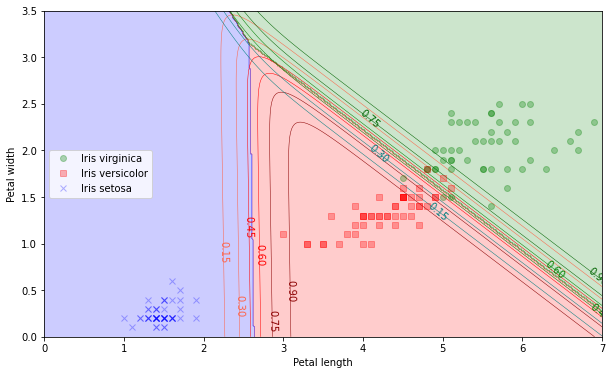

In [20]:
# 결정 경계를 그림으로 나타내기 

x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )

X_new = np.column_stack([x0.ravel(), x1.ravel()])

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz2 = y_proba[:, 2].reshape(x0.shape)
zz1 = y_proba[:, 1].reshape(x0.shape)

zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10,6))
plt.plot(X[y==2, 0], X[y==2, 1], "go", label="Iris virginica", alpha=0.3)
plt.plot(X[y==1, 0], X[y==1, 1], "rs", label="Iris versicolor", alpha=0.3)
plt.plot(X[y==0, 0], X[y==0, 1], "bx", label="Iris setosa", alpha=0.3)

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(["blue", "red",  "green"])
custom_cmap1 = ListedColormap(["tomato", "red", "darkred"])
custom_cmap2 = ListedColormap(["teal", "green", "darkgreen"])
plt.contourf(x0, x1, zz, cmap=custom_cmap, alpha=0.2)
contour1 = plt.contour(x0, x1, zz1, cmap=custom_cmap1, linewidths=0.5)
contour2 = plt.contour(x0, x1, zz2, cmap=custom_cmap2, linewidths=0.5)
plt.clabel(contour1, inline=False, fontsize=10, fmt='%1.2f')
plt.clabel(contour2, inline=False, fontsize=10, fmt='%1.2f')

plt.xlabel("Petal length", fontsize=10)
plt.ylabel("Petal width", fontsize=10)
plt.legend(loc="center left", fontsize=10)
plt.axis([0, 7, 0, 3.5])
plt.show()

## 이론 연습문제 

1) 시그모이드 함수 $\sigma(t) = \dfrac 1 {1+\exp{(-t)}}$의 도함수가 다음과 같음을 보이시오.  ($\exp(-t)=e^{-t})$
$$\sigma'(t)= \sigma(t)\bigl(1-\sigma(t)\bigr)$$

2) 위 설명 중 <span style="color:red"> (check 1)</span>을 증명하시오. (단, 각 $i \ (1\le i \le m)$에 대해 $x_{i0}=1$)

3) 이산확률변수 $Y$가 취할 수 있는 값이 $k$ 가지($c_1,\cdots,c_k$)일 때 베이즈 정리로부터 
$$ $$
$$\text{P}(Y=c_k|X=\mathbf x)=\dfrac{\text{P}(Y=c_k)\text{P}(X=\mathbf x|Y=c_k)}{\sum_{i=1}^K \text{P}(Y=c_i)\text{P}(X=\mathbf x|Y=c_i)}$$
이 성립한다. 다음과 같이 베이즈 정리와 시그모이드함수, 소프트맥스 함수 사이의 관계를 살펴보시오. 

3-1) $K=2$일 때, 시그모이드 함수 $\sigma$에 대해 $\text{P}(Y=c_k|X=\mathbf x)=\sigma(a)$이다. $a$를 구하시오. 

3-2) $K>2$일 때, 소프트맥스 함수 $\sigma$에 대해 $\text{P}(Y=c_k|X=\mathbf x)=\sigma(a)$이다. $a$를 구하시오.

4) 위 설명 중 <span style="color:red"> (check 2)</span>를 증명하시오. 

5) 사진을 낮과 밤, 실내와 실외로 분류를 하려고 할 때, 두 개의 로지스틱 회귀 분류기를 만들어야 할 지, 아니면 하나의 소프트맥스 회귀 분류기를 만들어야 할 지 설명하시오. 

## 실습 연습문제 

1) 훈련 데이터셋의 특성벡터 $\mathbf x_i = (1,x_{i1},\cdots,x_{in})^{\rm T}$를 $i$번째 행벡터로 갖는 $m\times (n+1)$ 행렬을 $\mathbf X$, 각 샘플에 대한 레이블 $y_i$로 이루어진 레이블 벡터를 $\mathbf y=(y_1,\cdots, y_m)^{\rm T}$, 모델 파라미터 벡터를 $\boldsymbol{\theta}=(\theta_0,\cdots,\theta_n)^{\rm T}$라 하면, 모두 Numpy 배열을 이용하여 나타낼 수 있다. 이때, <span style="color:red"> (check 1)</span>의 식을 참고하여 넘파이 배열과 `np.exp`함수(배열의 각 성분에 대해 계산되는 ufunc)를 이용하여  $\nabla_{\boldsymbol{\theta}}J(\boldsymbol{\theta})$를 구현하는 코드를 작성하시오.   
> 참고 ufunc(universal function) [링크](https://numpy.org/doc/stable/reference/ufuncs.html?highlight=ufunc)

2) Numpy의 장점(vectorization(순환문 없이 구현), ufunction, broadcasting)을 활용하여  위 <span style="color:red"> (check 1)</span>의 식으로부터 로지스틱 회귀 비용함수의 그래디언트 벡터 $\nabla_{\boldsymbol{\theta}}J(\boldsymbol{\theta})$를 계산하는 식을 효율적으로 구현하고, (배치 또는 확률적)경사하강법을 이용하여 로지스틱 회귀를 학습시키는 코드를 작성하여 붓꽃 데이터셋에 적용시켜 보시오. 

(참고: vectorization에 대한 개념 이해 참고[링크](https://speakerdeck.com/jakevdp/losing-your-loops-fast-numerical-computing-with-numpy-pycon-2015?slide=38) )

2) <span style="color:red"> (check 3)</span>을 이용하여 overflow가 생기지 않도록 softmax 함수를 구현하시오. 